<a href="https://colab.research.google.com/github/ebj22/Eniac_project/blob/main/plot_biz_quests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
url = "https://drive.google.com/file/d/1kYlayC0gnCQOs3RVK2ip58kEEM-gibpb/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
project2_df = pd.read_csv(path)


In [4]:
project2_copy_df = project2_df.copy()

In [5]:
project2_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56447 entries, 0 to 56446
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                56447 non-null  int64  
 1   id_order          56447 non-null  int64  
 2   product_quantity  56447 non-null  int64  
 3   sku               56447 non-null  object 
 4   unit_price        56447 non-null  float64
 5   date              56447 non-null  object 
 6   total_unit_price  56447 non-null  float64
 7   name              56447 non-null  object 
 8   desc              56443 non-null  object 
 9   price             56415 non-null  float64
 10  in_stock          56447 non-null  int64  
 11  type              56434 non-null  object 
 12  short             56447 non-null  object 
 13  brand_name        56411 non-null  object 
 14  discount          56415 non-null  float64
dtypes: float64(4), int64(4), object(7)
memory usage: 6.5+ MB


In [6]:
# creating a new descounted1 column and asigning boolean values to it
project2_copy_df["discounted1"] = project2_copy_df["discount"] > 0

In [7]:
project2_copy_df

,id,id_order,product_quantity,sku,unit_price,date,total_unit_price,name,desc,price,in_stock,type,short,brand_name,discount,discounted1
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,OWC,OWC,13.50,True
1,1120182,299404,1,OWC0100,47.49,2017-01-01 22:50:39,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,OWC,OWC,13.50,True
2,1121550,300650,1,OWC0100,49.99,2017-01-02 15:31:09,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,OWC,OWC,11.00,True
3,1121801,300760,1,OWC0100,49.99,2017-01-02 17:20:31,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,OWC,OWC,11.00,True
4,1124334,301975,1,OWC0100,49.99,2017-01-03 20:04:54,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,OWC,OWC,11.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56442,1647425,526066,1,WAC0254,83.99,2018-03-12 17:45:42,83.99,Education - Wacom Intuos Graphics Tablet S Blu...,small-edge graphics tablet with Bluetooth inte...,99.00,1,1405,WAC,Wacom,15.01,True
56443,1647495,526093,1,WAC0252,83.99,2018-03-12 18:32:29,83.99,Education - Wacom Intuos Graphics Tablet S Blu...,small-edge graphics tablet with Bluetooth inte...,99.00,1,1405,WAC,Wacom,15.01,True
56444,1648399,526440,1,PAC2235,878.18,2018-03-13 15:08:27,878.18,Synology DS218 + NAS Server | 6GB RAM | 16TB (...,NAS storage server integrated with special foc...,1124.98,1,12175397,PAC,Pack,246.80,True
56445,1648457,526512,1,DLK0044-A,84.32,2018-03-13 16:19:18,84.32,Open - D-Link DCS-5020L wireless surveillance ...,Reconditioned surveillance camera with Wi-Fi r...,139.99,0,9094,DLK,D-Link,55.67,True


In [8]:
# creating a new descounted column and asigning string values to it
project2_copy_df.loc[project2_copy_df["discount"] > 0, "discounted"] = "desc"

In [9]:
project2_copy_df.loc[project2_copy_df["discount"] == 0, "discounted"] = "not_desc"

In [10]:
project2_copy_df.loc[project2_copy_df["discount"] < 0, "discounted"] = "incr"

In [11]:
# How big are the offered discounts as a percentage of the product prices?
project2_copy_df["disc_%_price"] = project2_copy_df["discount"]/project2_copy_df["price"] * 100

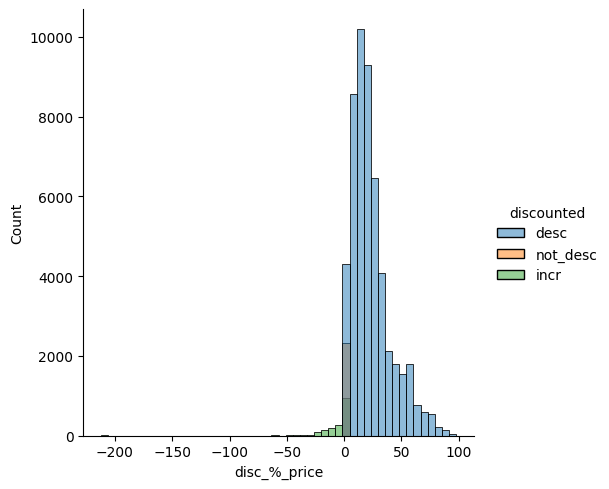

In [12]:
sns.displot(kind="hist",
            data=project2_copy_df,
            bins=50,
            x="disc_%_price",
            hue="discounted");

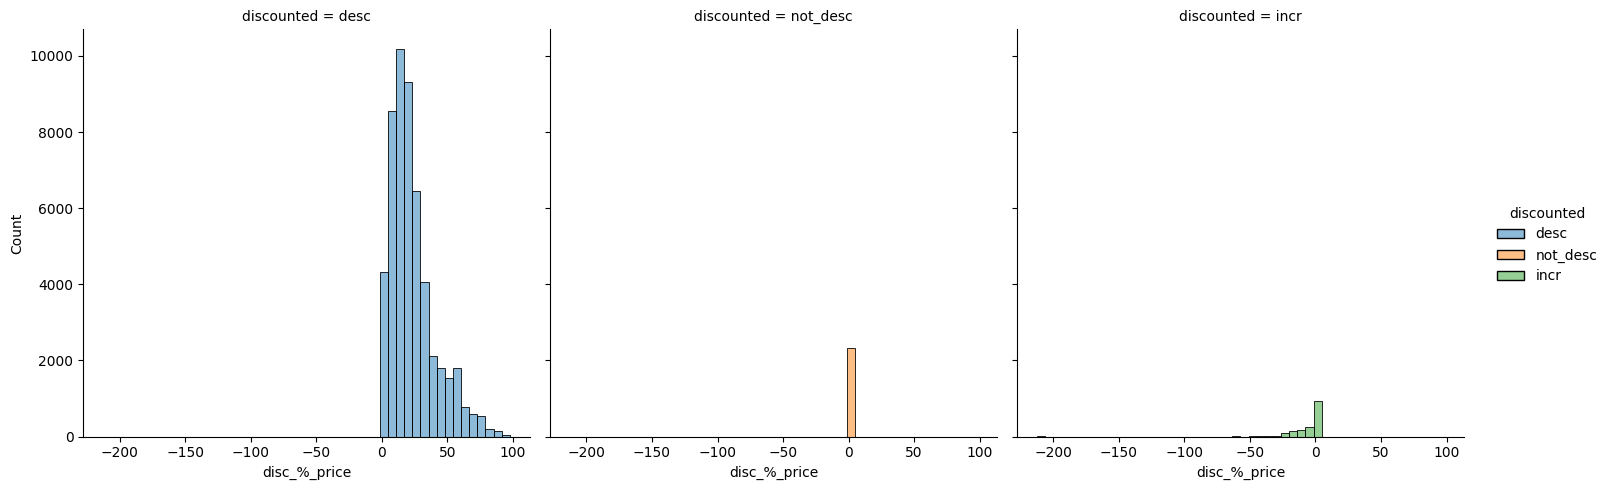

In [13]:
sns.displot(kind="hist",
            data=project2_copy_df,
            bins=50,
            x="disc_%_price",
            hue="discounted",
            col="discounted");

In [14]:
# sns.displot(data=project2_copy_df,
#             x="price",
#             hue="discounted1",
#             bins=70,
#             binwidth=60,
#             kde=True);

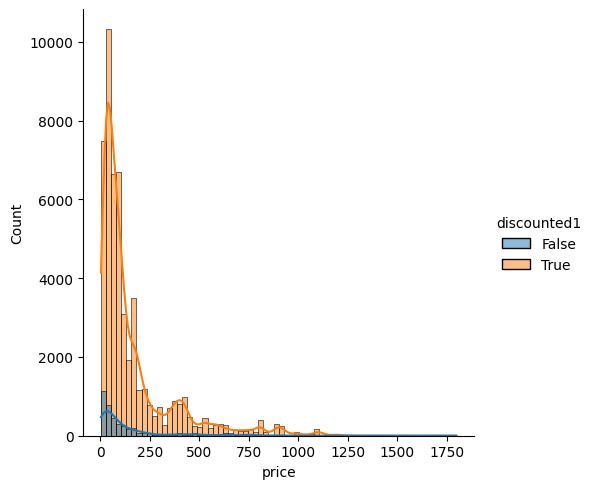

In [15]:
sns.displot(data=project2_copy_df,
            x="price",
            hue="discounted1",
            bins=70,
            kde=True);

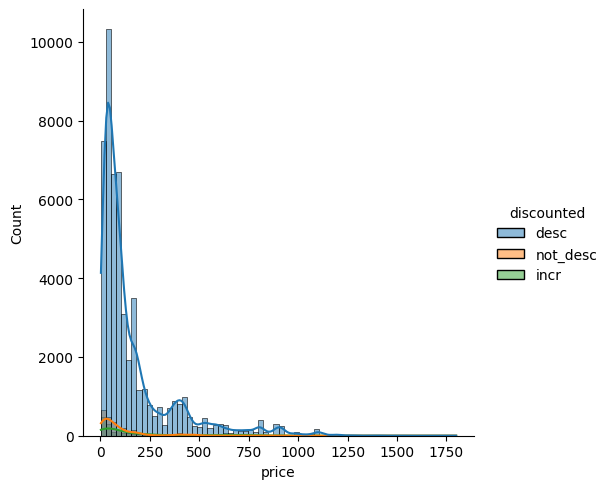

In [16]:
sns.displot(data=project2_copy_df,
            x="price",
            hue="discounted",
            bins=70,
            kde=True);

In [17]:
# sns.displot(data=project2_copy_df, x="price", hue="discounted1", bins=70, col="discounted1", binwidth=60)

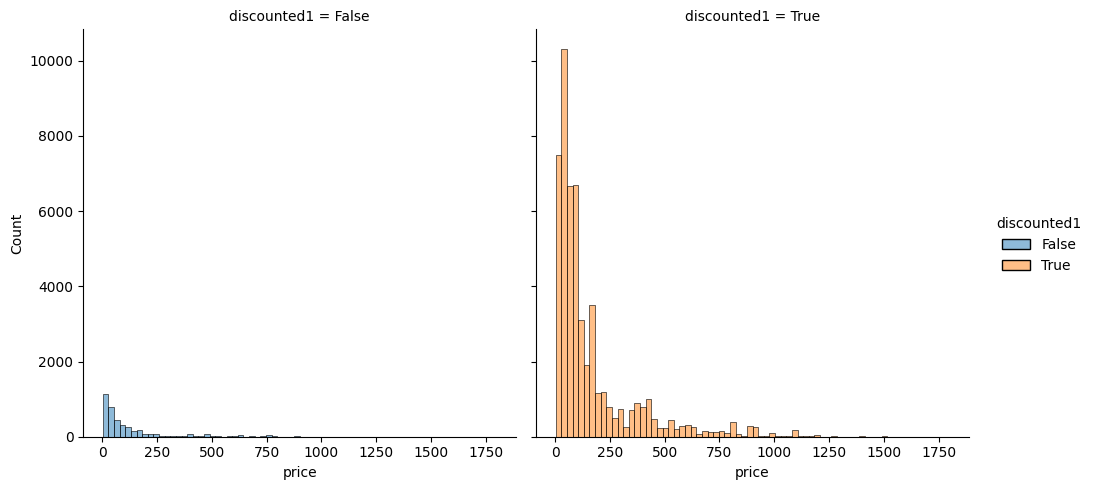

In [58]:
sns.displot(data=project2_copy_df, x="price", hue="discounted1", bins=70, col="discounted1");


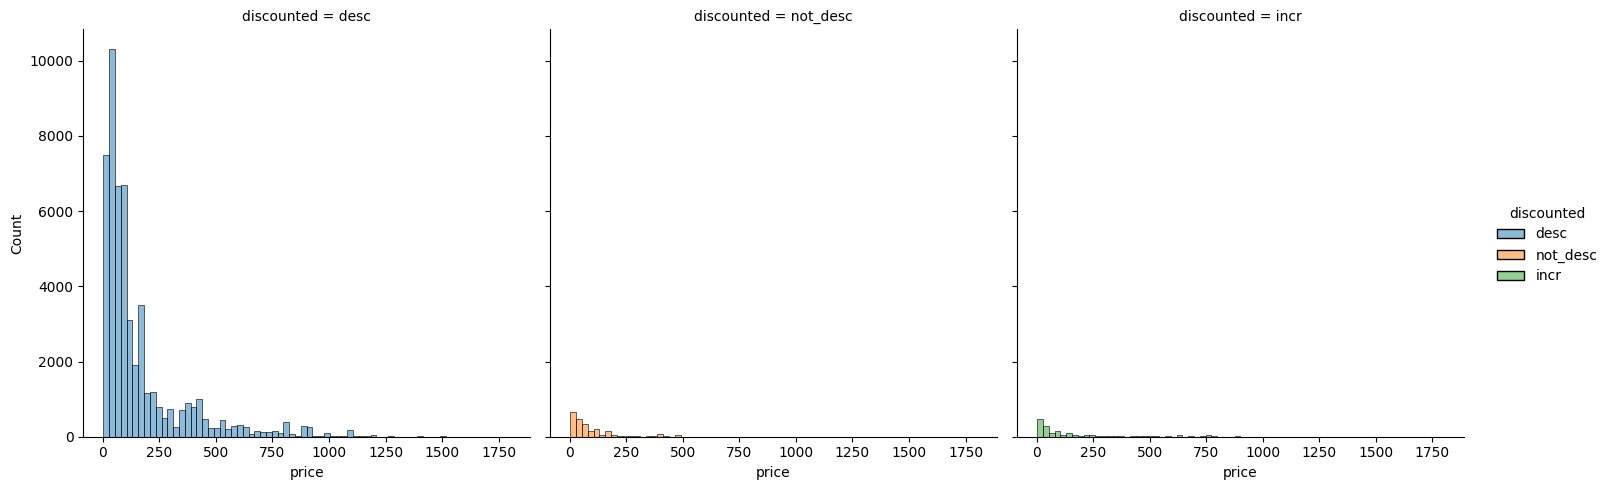

In [57]:
sns.displot(data=project2_copy_df, x="price", hue="discounted", bins=70, col="discounted");


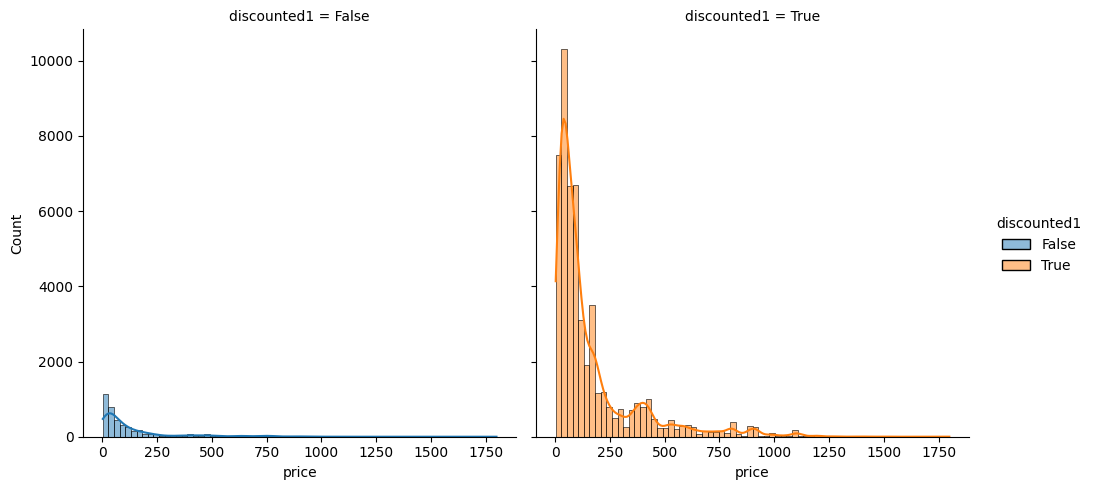

In [56]:
sns.displot(data=project2_copy_df, x="price", hue="discounted1", bins=70, col="discounted1", kde=True);


In [21]:
# ten largest products sold
ten_largest_products_sold = project2_copy_df.groupby("brand_name")[["sku"]].count().nlargest(10, columns="sku")

In [22]:
ten_largest_products_sold

,sku
brand_name,
Apple,10670
OWC,3568
Belkin,2203
LaCie,2028
Crucial,2011
Pack,1879
Western Digital,1848
Satechi,1742
Wacom,1680


In [23]:
project2_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56447 entries, 0 to 56446
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                56447 non-null  int64  
 1   id_order          56447 non-null  int64  
 2   product_quantity  56447 non-null  int64  
 3   sku               56447 non-null  object 
 4   unit_price        56447 non-null  float64
 5   date              56447 non-null  object 
 6   total_unit_price  56447 non-null  float64
 7   name              56447 non-null  object 
 8   desc              56443 non-null  object 
 9   price             56415 non-null  float64
 10  in_stock          56447 non-null  int64  
 11  type              56434 non-null  object 
 12  short             56447 non-null  object 
 13  brand_name        56411 non-null  object 
 14  discount          56415 non-null  float64
 15  discounted1       56447 non-null  bool   
 16  discounted        56415 non-null  object

In [24]:
# convert to datetime format
project2_copy_df["date"] = pd.to_datetime(project2_copy_df["date"])

In [25]:
# extract only the date and asign it to a new column
project2_copy_df["date_only"] = project2_copy_df["date"].dt.date

In [26]:
# project2_copy_df["week_only"] = project2_copy_df["date"].dt.isocalendar().week

In [27]:
# total number of products sold by date
date_sku_count = project2_copy_df.groupby("date_only")[["sku"]].count()

In [28]:
# total earnings by date
date_unit_price_sum = project2_copy_df.groupby("date_only")[["unit_price"]].sum()

In [29]:
date_unit_price_sum

,unit_price
date_only,
2017-01-01,15704.23
2017-01-02,36769.10
2017-01-03,38193.18
2017-01-04,16099.12
2017-01-05,11600.34
...,...
2018-03-10,8211.42
2018-03-11,9067.83
2018-03-12,22860.22


In [30]:
# date_unit_price_count

In [31]:
date_sku_count

,sku
date_only,
2017-01-01,136
2017-01-02,389
2017-01-03,333
2017-01-04,141
2017-01-05,160
...,...
2018-03-10,78
2018-03-11,74
2018-03-12,157


In [32]:
# percentage of earnings by products having their prices increased
project2_copy_df.loc[project2_copy_df["discounted"] == "incr", "unit_price"].sum() / project2_copy_df.loc[:, "unit_price"].sum() *100

4.210408053913298

In [33]:
# percentage of earnings by non discounted products
project2_copy_df.loc[project2_copy_df["discounted"] == "not_desc", "unit_price"].sum() / project2_copy_df.loc[:, "unit_price"].sum() *100

2.957718999321217

In [34]:
# percentage of earnings by discounted products
project2_copy_df.loc[project2_copy_df["discounted"] == "desc", "unit_price"].sum() / project2_copy_df.loc[:, "unit_price"].sum() *100

92.82699758952623

In [35]:
# amount earned by all products sold
project2_copy_df.loc[:, "unit_price"].sum()

7621800.449999999

In [36]:
# amount earned by products that have their prices raised
project2_copy_df.loc[project2_copy_df["discounted"] == "incr", "unit_price"].sum()

320908.89999999997

In [37]:
# amount earned by non discounted products
project2_copy_df.loc[project2_copy_df["discounted"] == "not_desc", "unit_price"].sum()

225431.44

In [38]:
# amount earned by discounted products
project2_copy_df.loc[project2_copy_df["discounted"] == "desc", "unit_price"].sum()

7075088.519999999

In [39]:
# mean percentage of price being descounted
project2_copy_df["disc_%_price"].mean()

21.425690634107394

In [40]:
# number of products not discounted
project2_copy_df.loc[~(project2_copy_df["discounted"] == "desc"), :]["sku"].nunique()

808

In [41]:
# number of products discounted
project2_copy_df.loc[project2_copy_df["discounted1"] == True, :]["sku"].nunique()

5135

In [42]:
# number of products sold
project2_copy_df["sku"].nunique()

5345

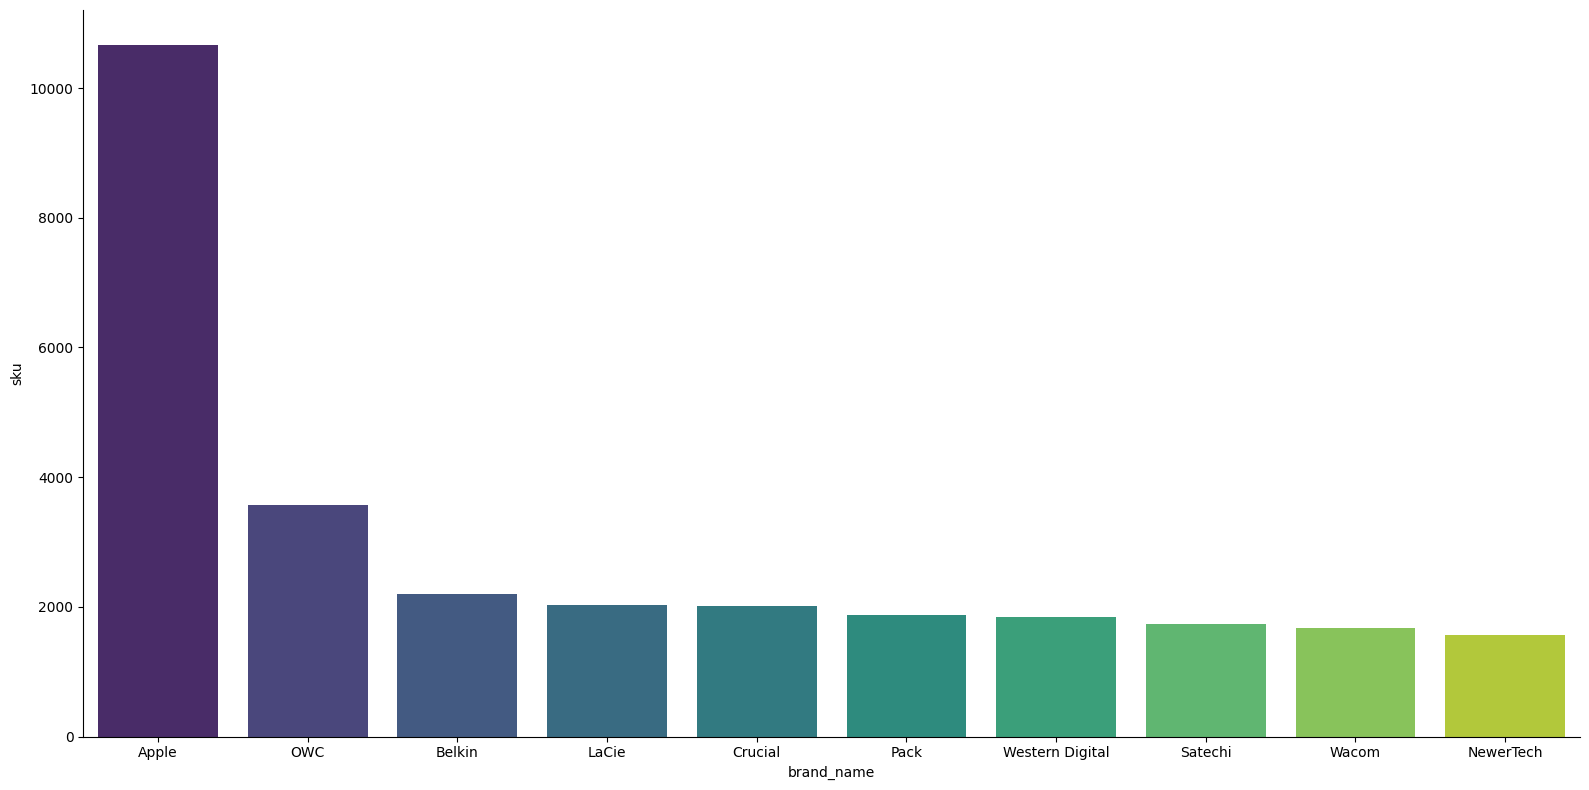

In [55]:
sns.catplot(kind="bar",
            data=ten_largest_products_sold,
            x="brand_name",
            y="sku",
            height=8,
            aspect=2,
            hue="brand_name",
            palette="viridis");

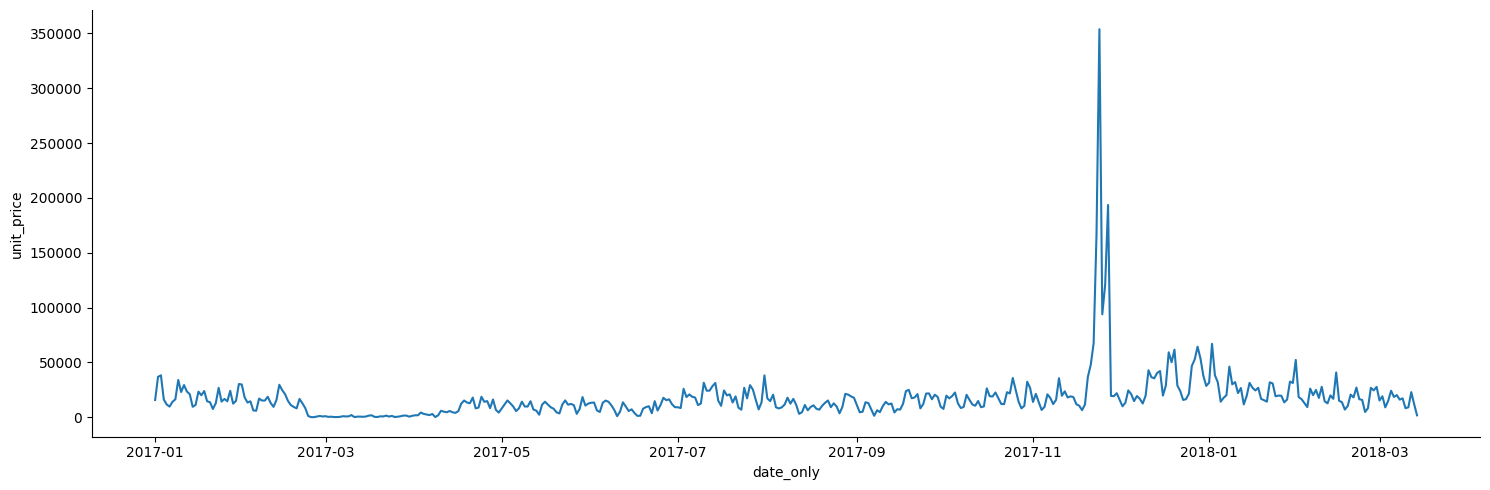

In [53]:
sns.relplot(
    data=date_unit_price_sum, kind="line",
    x="date_only", y="unit_price", aspect=3
);


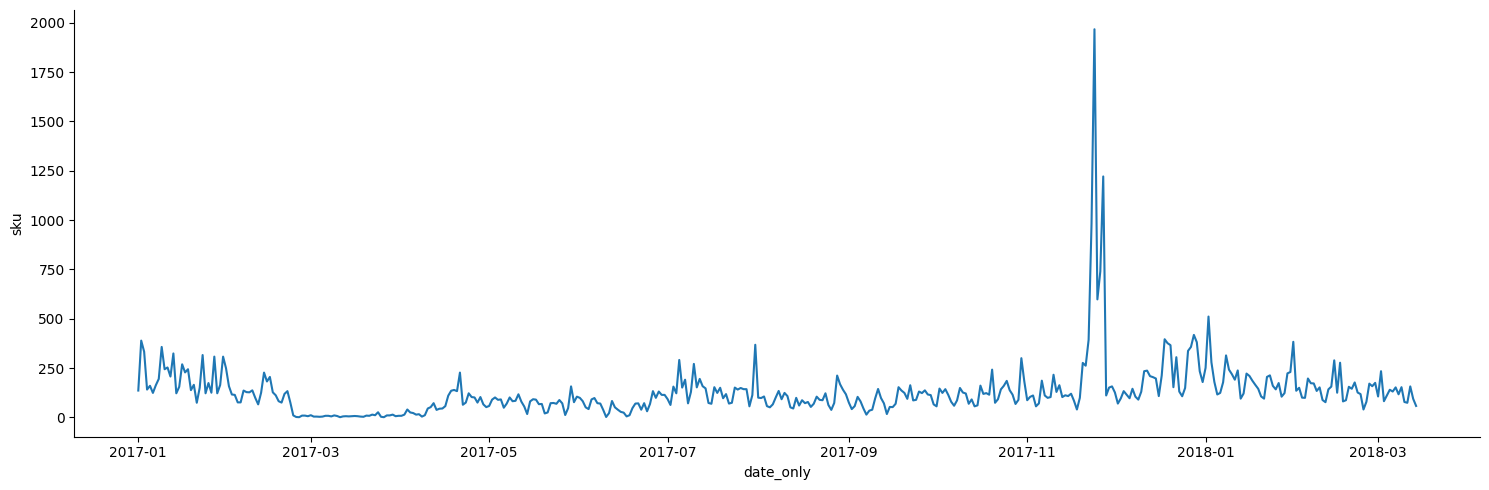

In [54]:
sns.relplot(
    data=date_sku_count, kind="line",
    x="date_only", y="sku", aspect=3
);

In [46]:
project2_copy_df.loc[project2_copy_df["discounted"] == "incr", "id"].count()

1674

In [47]:
project2_copy_df.loc[project2_copy_df["discounted"] == "not_desc", "id"].count()

2319

In [48]:
project2_copy_df.loc[project2_copy_df["discounted"] == "desc", "id"].count()

52422